## Figure: Agreement and Recource

In [8]:
#%%
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
import pandas as pd
import numpy as np
from functools import partial
import logging

from mono_multi.setup import (
    FIGURES_ROOT_DIR,
)
from mono_multi.metrics import (
    matrix_pairwise_evals,
)
from mono_multi.utils import (
    load_model_outputs_same_prompt,
    get_size_and_it,
    load_results_overview,
    add_evals_to_df,
    load_data_if_needed,
    filter_results_all_tasks,
)

from mono_multi.plotting import (
    plot_recourse_wrapper,
    plot_agreement_wrapper,
    configure_legend,
)

In [10]:
plot_config_file = "./results/.matplotlibrc"
plt.rcParams.update(mpl.rc_params_from_file(fname=plot_config_file))

# FIGURES_PAPER_DIR = FIGURES_ROOT_DIR / "paper" / "same-prompt"
FIGURES_PAPER_DIR = FIGURES_ROOT_DIR / "paper-arxiv" / "same-prompt"
TASKS = ["ACSIncome"]

In [11]:
select_by = "accuracy"  #"balanced_accuracy" #
fit_threshold_for = "balanced_accuracy"  #'accuracy' #

## Load predictions ACSIncome

In [12]:
num_shots = [4,8,10]
threshold_fitted = True

df = load_results_overview(
    num_shots=num_shots, threshold_fitted=threshold_fitted, same_prompt=True
)
df = df[df["task"].isin(TASKS)]
df = df[df["correct_order_bias"] == 0]
if threshold_fitted and ("threshold_obj" in df.columns):
    df = df[df["threshold_obj"] == fit_threshold_for]

df["predictions_path"] = "/Volumes/mgorecki/monoculture/" + df["predictions_path"]

df.shape

(146, 19)

In [13]:
try:
    assert set(TASKS).issubset(
        set(df["task"].unique())
    ), f"Results for all tasks to be analysed have to be available, available are: {list(df['task'].unique())} "
except AssertionError:
    TASKS = list(df["task"].unique())
    logging.warning(f"Reduced TASKS to available tasks: {TASKS}")

In [14]:
df_alln = {n:df[df['num_shots'] == n] for n in num_shots}
for n in num_shots:
    predictions_all = load_model_outputs_same_prompt(
    df_alln[n], tasks=TASKS, return_risk_scores=False
)

    df_alln[n] = add_evals_to_df(df[df['num_shots'] == n])

ACSIncome


/Users/mgorecki/Documents/projects/monoculture/monoculture/utils.py:721: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = (
/Users/mgorecki/Documents/projects/monoculture/monoculture/utils.py:721: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = (


ACSIncome


/Users/mgorecki/Documents/projects/monoculture/monoculture/utils.py:721: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = (
/Users/mgorecki/Documents/projects/monoculture/monoculture/utils.py:721: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = (


ACSIncome


/Users/mgorecki/Documents/projects/monoculture/monoculture/utils.py:721: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = (
/Users/mgorecki/Documents/projects/monoculture/monoculture/utils.py:721: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[metric] = (


## Restrict analysis to models based on performance or true labels?

In [15]:
try:
    data_all
except NameError:
    print("data not yet defined")
    data_all = load_data_if_needed(data=None, tasks=TASKS)
else:
    print("Already defined, update if needed.")
    data_all = load_data_if_needed(data=data_all, tasks=TASKS)

data not yet defined
ACSIncome


In [16]:
restrict_to_better_const = True
restrict_to_positive_label = True
restrict_to_negative_label = False
restrict_to_top_eps = True
eps = 0.05
restrict_to_topk = False
topk = 10

predictions = {}
data = {}

for n in num_shots:
    predictions[n], data[n] = filter_results_all_tasks(
        predictions=predictions_all.copy(),
        df=df_alln[n],
        data={t: val for t, val in data_all.items() if t in TASKS},
        tasks=TASKS,
        restrict_to_better_const=restrict_to_better_const,
        restrict_to_positive_label=restrict_to_positive_label,
        restrict_to_negative_label=restrict_to_negative_label,
        restrict_to_top_eps=restrict_to_top_eps,
        restrict_to_topk=restrict_to_topk,
        eps=eps,
        topk=topk,
        acc=select_by,
)

ACSIncome
- before: (166450, 50)
Using accuracy for comparison.
- after: (61233, 34)
ACSIncome
- before: (166450, 50)
Using accuracy for comparison.
- after: (61233, 28)
ACSIncome
- before: (166450, 50)
Using accuracy for comparison.
- after: (61233, 35)


## Plot

In [17]:
# helpers
def build_filename():
    parts = [
        f"agreement-recourse-{num_shots if isinstance(num_shots, int) else '-'.join(str(n) for n in num_shots)}-shot",
        f"-{TASKS[0]}",
        (
            f"_selected_by-{select_by.replace('_','-')}"
            f"_tresh_fitted-{fit_threshold_for.replace('_','-')}"
            if threshold_fitted
            else ""
        ),
        "_better_const" if restrict_to_better_const else "",
        "_pos_instances" if restrict_to_positive_label else "",
        "_neg_instances" if restrict_to_negative_label else "",
        f"_eps{str(eps).replace('.', '_')}" if restrict_to_top_eps else "",
        f"_top{topk}" if restrict_to_topk else "",
    ]
    return "".join(parts)

mean agreement: 0.8861
mean agreement at random: 0.6472
mean agreement: 0.9080
mean agreement at random: 0.6519
mean agreement: 0.8814
mean agreement at random: 0.6427
agreement-recourse-4-8-10-shot-ACSIncome_selected_by-accuracy_tresh_fitted-balanced-accuracy_better_const_pos_instances_eps0_05


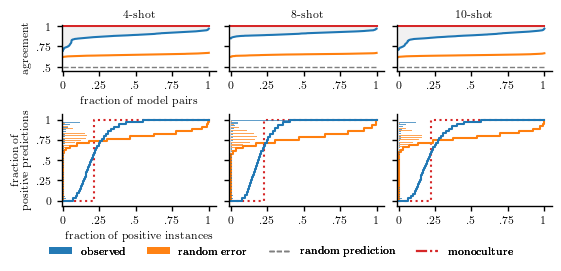

In [18]:
tasks_to_plot = TASKS
selection_by = "accuracy"

# fig_width = plt.rcParams["figure.figsize"][0]
# fig_height = 2 if num_shots == 0 else 1.5
fig_width = plt.rcParams["figure.figsize"][0]  # * 2 * (2/6) * (8/5)
fig_height = 0.8*plt.rcParams["figure.figsize"][1]  # 0.8*

recourse_observed = {}
recourse_at_random = {}

fig, axs = plt.subplots(
    2,
    len(num_shots),
    figsize=(fig_width, fig_height),
    constrained_layout=True,
    gridspec_kw={"height_ratios": [1, 2]},
    sharey="row"
)

for i, n in enumerate(num_shots):
    task = 'ACSIncome'
    # agreement
    mask = (df_alln[n]["task"] == task) & (df_alln[n]["model"].isin(predictions[n][task].columns))
    axs[0,i], agreement_data = plot_agreement_wrapper(
        axs[0, i], predictions=predictions[n][task], df = df_alln[n][mask], 
        title=f"{n}-shot", 
        xlabel='', 
        ylabel=''
    )
    print(f"mean agreement: {agreement_data['observed'].agreement.mean():.4f}")
    print(
        f"mean agreement at random: {agreement_data['baseline'].agreement.mean():.4f}"
    )

    # # recourse
    axs[1, i], observed, at_random = plot_recourse_wrapper(
        axs[1, i],
        predictions=predictions[n][task],
        df=df_alln[n][mask],
        bootstrap=False,
        xlabel='',
        ylabel=''
    )

    recourse_observed[n] = observed
    recourse_at_random[n] = at_random

    configure_legend(fig, axs, offset=0.2)

axs[0, 0].set_ylabel("agreement")
axs[0,0].set_xlabel("fraction of model pairs")
# axs[0, len(tasks_to_plot) // 2].set_xlabel("fraction of model pairs")

axs[1, 0].set_ylabel(f"fraction of\n {'positive' if restrict_to_positive_label else 'negative'} predictions")
axs[1, 0].set_xlabel(f"fraction of {'positive' if restrict_to_positive_label else 'negative'} instances")


file_name = build_filename()
for ending in [".png", ".pdf"]:
    plt.savefig(FIGURES_PAPER_DIR / f"num_shots_{file_name}{ending}")
print(file_name)

plt.show()

In [19]:
import numpy as np

output = f"{'num shots':20} &   M  & \tno recourse & substantial recourse & full recourse\\\\"

for num in recourse_observed.keys():
    M = predictions[num]['ACSIncome'].shape[1]
    rec = recourse_observed[num]
    frac_models = rec[:, 1]
    frac_ind = rec[:, 0]
    max_frac_no_rec = (
        sum(frac_ind[frac_models == 0.0]) if sum(frac_models == 0.0) > 0 else 0.0
    )
    frac_limited_rec = (
        sum(frac_ind[frac_models <= 0.5]) if sum(frac_models <= 0.5) > 0 else 0.0
    )
    frac_substantial_rec = 1 - frac_limited_rec
    frac_full_rec = (
        sum(frac_ind[np.isclose(frac_models, 1.0)])
        if sum(np.isclose(frac_models, 1.0)) > 0
        else 0.0
    )
    output += (
        f"\n{num} & {M:3}  &\t{max_frac_no_rec:.2f}"
        f"&\t{frac_substantial_rec:.2f}"
        f"&\t{frac_full_rec:.2f}\\\\"
    )

print(output)

num shots            &   M  & 	no recourse & substantial recourse & full recourse\\
4 &  34  &	0.07&	0.80&	0.45\\
8 &  28  &	0.08&	0.81&	0.59\\
10 &  35  &	0.07&	0.80&	0.43\\
